# **Standart Scaler**

## Import & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
map_gender = {
    "Male" : 1,
    "Female" : 0
}

In [4]:
df["Gender"] = df["Gender"].map(map_gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


---
## Train Test Split

In [5]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size= 0.25, random_state = 9)

---
## Standart Scaler Olmayan Model

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
pred = knn.predict(X_test)

---
## Model Değerlendirme

In [12]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

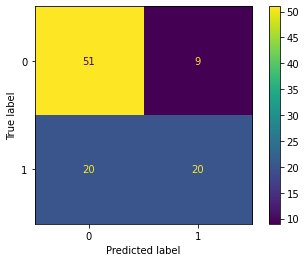

In [13]:
ConfusionMatrixDisplay.from_estimator(knn,X_test,y_test)

29 hatalı sonuç

In [14]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        60
           1       0.69      0.50      0.58        40

    accuracy                           0.71       100
   macro avg       0.70      0.68      0.68       100
weighted avg       0.71      0.71      0.70       100



---
## Standart Scaler Model

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
# Değişkenlerden X ve scaled_X arasındaki farka bakmanızı öneririm

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)

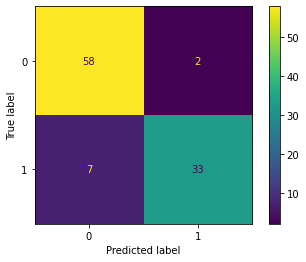

In [19]:
ConfusionMatrixDisplay.from_estimator(knn,scaled_X_test,y_test)

9 hatalı sonuç

In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        60
           1       0.94      0.82      0.88        40

    accuracy                           0.91       100
   macro avg       0.92      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



# **https://www.youtube.com/watch?v=U8wLBOlCKPU**